<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Multi_LR_IRIS-MOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import sklearn.datasets  # to import iris
import matplotlib.pyplot as plt  # %matplotlib inline # this line şs for jupyter notebooks



In [2]:

# logistic regression parameters
num_iter = 250000
alpha = 0.1
# #load iris dataset
iris = sklearn.datasets.load_iris()
# # define working data; features X and labels y
# X = iris.data[:, :]
# y = iris.target
X, y = sklearn.datasets.load_iris(return_X_y=True)


In [3]:
X.shape

(150, 4)

In [4]:
y.shape
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
 # model for class 0
y_0 = np.copy(y)
y_0[y == 2] = 1
y_0 = y_0 - 1
y_0 = y_0 * -1

In [8]:
# model for class 1
y_1 = np.copy(y)
y_1[y == 2] = 0
print(y_1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [12]:
# model for class 2
y_2 = np.copy(y)
y_2[y == 1] = 0
y_2[y == 2] = 1
print(y_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [10]:
# define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [11]:

# define cost function
# J(theta) = 1/m (-y^T log(h) - (1-y)^T log(1-h) )
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)) / y.size

In [13]:
# define z = theta transpose * x
# z = np.dot(X, theta)
# Hypothesis(x) = sigmoid(z)
# h = sigmoid(z)
# predict for test data
# P (Xt | class = 1)
def predict(Xt, theta):
    z = np.dot(np.transpose(Xt), theta)
    return sigmoid(z)

In [ ]:

# gradient is the partial derivative of loss function wrt theta
# gradient = np.dot(X.T, (h - y)) / y.size


In [14]:
def grad_desc(X, y, alpha, num_iter):
    # run gradient descent to adjust theta
    #  1. Calculate gradient average
    #  2. Multiply by learning rate alpha
    #  3. Subtract from weights
    # init weights - i choose all to be zero initially for consistent results
    theta = np.zeros(X.shape[1])
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta = theta - alpha * gradient

        # if( i % 50000 == 0):
        #     calc_loss = cost(h, y)
        #     print('iter num: ', i, 'cost : ', calc_loss.mean(), 'theta: ', theta)
    print('iter num: ', i, 'cost : ', cost(h, y).mean(), 'theta: ', theta)
    return theta


In [15]:
# add intercept
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
# add X0=1 to input data
Xt = np.concatenate(([1], Xt))

NameError: name 'Xt' is not defined

In [ ]:
# model for class 0
y_0 = np.copy(y)
y_0[y == 2] = 1
y_0 = y_0 - 1
y_0 = y_0 * -1
theta_0 = grad_desc(X, y_0, alpha, num_iter)

In [ ]:
# model for class 1
y_1 = np.copy(y)
y_1[y == 2] = 0
theta_1 = grad_desc(X, y_1, alpha, num_iter)

In [ ]:
# model for class 2
y_2 = np.copy(y)
y_2[y == 1] = 0
y_2[y == 2] = 1

theta_2 = grad_desc(X, y_2, alpha, num_iter)

In [ ]:
    # use i th model to decide for c_i

preds = np.zeros(len(np.unique(y)))
preds[0] = predict(Xt, theta_0)
preds[1] = predict(Xt, theta_1)
preds[2] = predict(Xt, theta_2)

print("class 0 P = ", preds[0])
print("class 1 P = ", preds[1])
print("class 2 P = ", preds[2])

# choose max
class_label = np.where(preds == max(preds))

# print result
# print("Test point ", Xt, " has label ", class_label[0], " according to logistic regression classification")


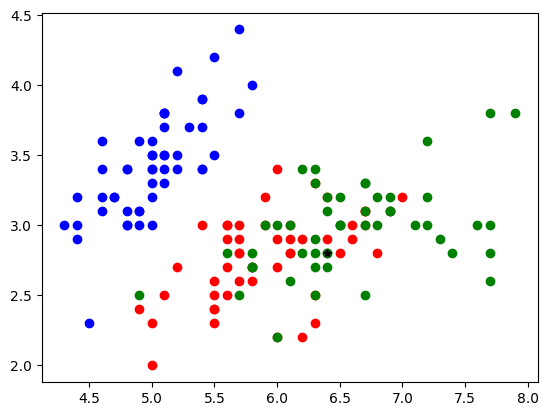

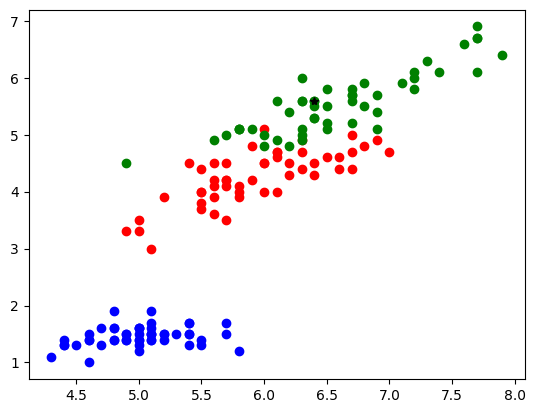

iter num:  249999 cost :  3.315308699386784e-07 theta:  [ 0.7794209   1.26223593  4.30162453 -6.8107031  -3.27548898]
iter num:  249999 cost :  0.0032237705504168496 theta:  [ 7.37848655 -0.24535671 -2.79656809  1.31364331 -2.77834391]
iter num:  249999 cost :  0.0002846248354986091 theta:  [-22.82548815  -3.08449933  -5.31424996   7.24302427  12.90026622]
class 0 P =  2.4222634707592633e-11
class 1 P =  0.31472066177318364
class 2 P =  0.9999898226713536
Test point  [6.4 2.8 5.6 2.2]  has label  [2]  according to logistic regression classification
which is  virginica


/tmp/ipython-input-1630166134.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("which is ", iris.target_names[int(log_reg_result)])


In [ ]:
# # Step 1 : Visualize data

colors = ['b', 'r', 'g']
for c in np.unique(y):
    plt.plot(X[y == c, 0], X[y == c, 1], 'o', color=colors[int(c)])
# also print our test datapoint
plt.plot(Xt[0], Xt[1], '*', color="k")
plt.show()  # x0 vs x1

for c in np.unique(y):
    plt.plot(X[y == c, 0], X[y == c, 2], 'o', color=colors[int(c)])
# also print our test datapoint
plt.plot(Xt[0], Xt[2], '*', color="k")
plt.show()  # x0 vs x2

# call logistic regression and print result
log_reg_result = log_reg(X, y, alpha, num_iter, Xt)
print("Test point ", Xt, " has label ", log_reg_result, " according to logistic regression classification")
print("which is ", iris.target_names[int(log_reg_result)])